### 畫漲幅、RS關係圖

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import tsne
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load the data
d1 = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\Stock_Data_Collector\全個股條件篩選\2024-07-11選股.xlsx', header=0, index_col=0)
def tsne_plot(stock_choose_df):
    # 產業別 translate to number
    industry_dict = {}
    industry_list = stock_choose_df['產業別'].unique()
    for i, industry in enumerate(industry_list):
        industry_dict[industry] = i
    stock_choose_df['產業別'] = stock_choose_df['產業別'].map(industry_dict)
    tsne_stock_choose_df = stock_choose_df.loc[:, ['ES250rate', 'ES20rate', 'ROCP']]
    # Create a TSNE instance: model
    model = TSNE(learning_rate=100)

    # Apply fit_transform to samples: tsne_features
    tsne_features = model.fit_transform(tsne_stock_choose_df)

    # Select the 0th feature: xs
    xs = tsne_features[:,0]

    # Select the 1st feature: ys
    ys = tsne_features[:,1]

    # Scatter plot, coloring by variety_numbers
    plt.figure(figsize=(20, 20))
    color_map = plt.cm.get_cmap('hsv', len(industry_list))
    for i in range(industry_list.shape[0]):
        plt.scatter(xs[stock_choose_df['產業別'] == i], ys[stock_choose_df['產業別'] == i], alpha=0.5, label=industry_list[i], c=[color_map(i)])
        # plt.scatter(xs, ys, alpha=0.5)
    plt.show()
tsne_plot(d1)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假設您的數據框名為df，包含兩列：'ROCP'（當日漲幅）和 'ES250rate'（中期相對強度）
# 創建相對強度分類
df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\Stock_Data_Collector\全個股條件篩選\2024-07-11選股.xlsx', header=0, index_col=0)
# figure text style 中文
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
conditions = [
    (df['ES250rate'] >= 20) & (df['ES250rate'] < 35),
    (df['ES250rate'] >= 35) & (df['ES250rate'] < 50),
    (df['ES250rate'] >= 50) & (df['ES250rate'] < 65),
    (df['ES250rate'] >= 65) & (df['ES250rate'] < 80),
    (df['ES250rate'] >= 80) & (df['ES250rate'] < 95),
    (df['ES250rate'] >= 95)
]
choices = ['20-35', '35-50', '50-65', '65-80', '80-95', '>=95']
df['相對強度分類'] = np.select(conditions, choices, default='未知')

# 計算每個分類的統計值
grouped = df.groupby('相對強度分類')['ROCP'].describe()
print(grouped)
df = df.drop(df.loc[df['相對強度分類'] == '未知'].index.values)
df = df.sort_values(by='相對強度分類')
# 繪製箱線圖
plt.figure(figsize=(20, 10))
sns.boxplot(x='相對強度分類', y='ROCP', data=df)
plt.title('不同相對強度分類的當日漲幅分布')
plt.show()

# 繪製密度圖
plt.figure(figsize=(20, 10))
sns.kdeplot(data=df, x='ROCP', hue='相對強度分類', fill=True)
plt.title('不同相對強度分類的當日漲幅密度圖')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import tsne


d1 = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\Stock_Data_Collector\全個股條件篩選\2024-07-10選股.xlsx', header=0, index_col=0)
d2 = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\Stock_Data_Collector\全個股條件篩選\2024-07-11選股.xlsx', header=0, index_col=0)
def scatter_plot(stock_choose_df):
    ## Do normalization first
    # stock_choose_df['ES250rate'] = stock_choose_df['ES250rate'].apply(lambda x: (x - stock_choose_df['ES250rate'].min()) / (stock_choose_df['ES250rate'].max() - stock_choose_df['ES250rate'].min()))
    # stock_choose_df['ROCP'] = stock_choose_df['ROCP'].apply(lambda x: (x - stock_choose_df['ROCP'].min()) / (stock_choose_df['ROCP'].max() - stock_choose_df['ROCP'].min()))
    # stock_choose_df['ES250rate'] = stock_choose_df['ES250rate'].apply(lambda x: (x - stock_choose_df['ES250rate'].mean()) / stock_choose_df['ES250rate'].std())
    # stock_choose_df['ROCP'] = stock_choose_df['ROCP'].apply(lambda x: (x - stock_choose_df['ROCP'].mean()) / stock_choose_df['ROCP'].std())
    ##plot scatter plot for each stock, y = ES250rate, x = ROCP
    fig, ax = plt.subplots()
    fig.set_size_inches(10.5, 10.5)
    ax.scatter(stock_choose_df['ROCP'], stock_choose_df['ES250rate'], c='blue', alpha=0.2, s=50)
    plt.xlabel('ROCP')
    plt.ylabel('ES250rate')
    plt.title('ROCP vs ES250rate')
    plt.show()
scatter_plot(d1)
scatter_plot(d2)

### 畫收盤價與MA相對位置

In [ ]:
## read csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from IPython.display import clear_output
## read all xlsx in 全個股條件篩選 file name and save to list
file_list = []
for root, dirs, files in os.walk(r'C:\Users\User\Desktop\StockInfoHub\Stock_Data_Collector\全個股條件篩選'):
    for file in files:
        if all([file.endswith('.xlsx'), int(file.split('-')[0]) >= 2022]):
            file_list.append(file)
print(file_list)
for file in file_list:
    today_df = pd.read_excel(f'C:\\Users\\User\\Desktop\\StockInfoHub\\Stock_Data_Collector\\全個股條件篩選\\{file}', header=0, index_col=0)
    df = today_df[['Adj Close', '5MA', '10MA', '20MA', '50MA', '100MA', '150MA', '200MA']]
    for i, col in enumerate(df.columns[1:]):
        df[f'{col}_diff'] = 100*(df['Adj Close'] - df[col])/df[col]
    # for i, col in enumerate(df.columns[1:8]):
    #     plt.figure(figsize=(40, 15))
    #     plt.vlines(0, 0, 4, colors='r', linestyles='dashed')
    #     plt.scatter(df[f'{col}_diff'], np.full(len(df[f'{col}_diff']), 2), s = 1)
    #     plt.show()
    plt.figure(figsize=(15, 15))
    L1 = '10MA_diff'
    L2 = '100MA_diff'
    # L1_max = abs(df[f'{L1}']).max()
    # L2_max = abs(df[f'{L2}']).max()
    L1_max = 100
    L2_max = 200
    max_value = max(L1_max, L2_max)
    plt.vlines(0, -L1_max, L1_max, colors='r', linestyles='dashed')
    plt.hlines(0, -L2_max, L2_max, colors='r', linestyles='dashed')
    plt.scatter(df[f'{L2}'], df[f'{L1}'], s = 1)
    plt.xlabel(L2)
    plt.ylabel(L1)
    plt.savefig(fr'C:\Users\User\Desktop\StockInfoHub\others\收盤價散佈圖10vs100\{file.split(".")[0]}.png')
    plt.show()
    # delay 1 second
    # time.sleep(1)
    # # clear output
    # clear_output()

### 畫指數對照金流、RS圖

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


        ID       買入日期   策略        獲利%  持有天數
3689  8924 2021-10-21   T6  -7.396457  33.0
3690  3661 2021-10-21   T6  21.057984  27.0
3691  2371 2021-10-21  T21  -5.619599  20.0
3692  5371 2021-10-21   TM  44.561395  33.0
3693  1570 2021-10-21   TM   2.216761  92.0
           Date  T5  T5-2  T6  T11  T21  CF         TAIEX  TAIEX change %  \
0    2021-10-18  18    11  50   46   10  50  16705.460938           -0.45   
499  2023-11-08  40    42  50   77   25  50  16740.830078            0.33   

     CF ROCP Mean  CF ROCP STD  CF ERS Mean  CF ERS STD  CF RS Mean  CF RS STD  
0          0.6776     8.339259       82.334   24.170091         NaN        NaN  
499        1.1414     3.591775       84.386   21.043919         NaN        NaN  


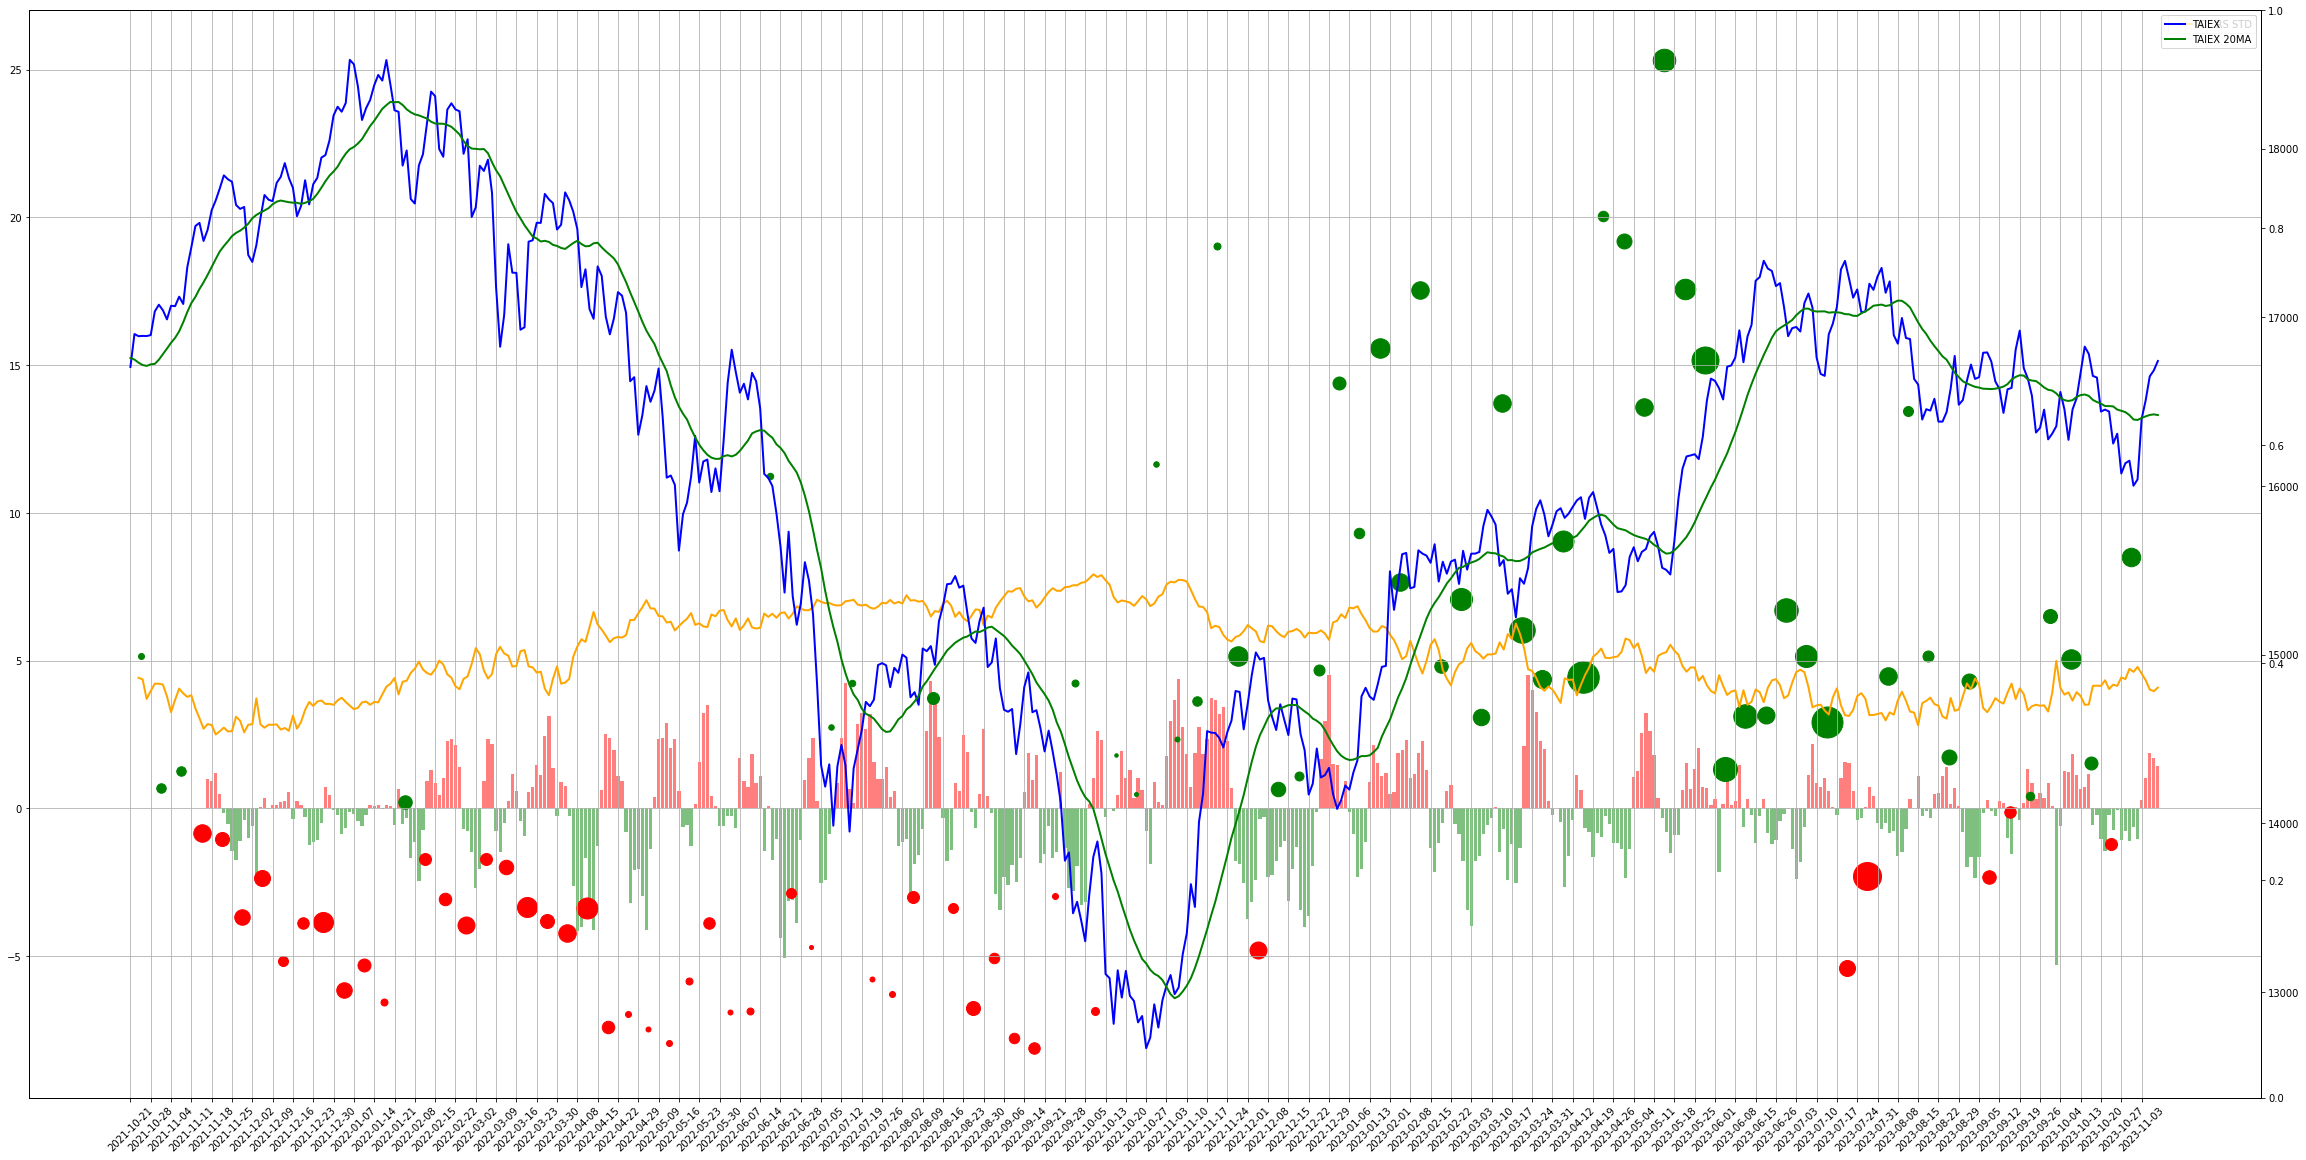

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib

df = pd.read_excel(f'C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/每日策略選股數量.xlsx')
TAIEX = pd.read_csv(r'C:\Users\User\Desktop\StockInfoHub\Stock_Data_Collector\history_data\^TWII.csv', header=0)
df_profit = pd.read_excel(r'C:\Users\User\Desktop\投資檢討\投資日記.xlsx', sheet_name='投資損益(全部)', header=0)
df_backtest = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\ETF_backtesting\回測\回測結果10.xlsx', header=0)
df_backtest = df_backtest[['ID', '買入日期', '策略', '獲利%', '持有天數']]
df_backtest = df_backtest.loc[df_backtest['買入日期'] >= '20211021']
print(df_backtest.head())

# profit = df_profit.loc[:198, '含本金累積損益(%)']
x = 200
r = 500
x_tick_day = 5
day = TAIEX.iloc[-r-x:-x, :]['Date'].values
TAIEX_MACD = TAIEX.iloc[-r-x:-x, :]['MACDhist'].values
TAIEX_20MA = TAIEX.iloc[-r-x:-x, :]['20MA'].values

# read profit sheet 投資損益(全部) in 投資日記 excel 


df = df.iloc[x+0:x+r].iloc[::-1].reset_index(drop=True)
print(df.iloc[[0,-1]])
taiex = df['TAIEX change %']
cf_rocp_mean = df['CF ROCP Mean']
cf_rocp_std = df['CF ROCP STD']
cf_rs_mean = df['CF ERS Mean']
cf_rs_std = df['CF ERS STD']
## 10MA
n = 1
taiex_MA = df['TAIEX']
cf_rocp_mean_MA = df['CF ROCP Mean'].rolling(window=6).mean()**2
# CF_rocp_mean_sq_MA = df['CF ROCP Mean'].rolling(window=n).mean()
cf_rocp_std_MA = df['CF ROCP STD'].rolling(window=6).mean()
cf_rs_mean_MA = df['CF ERS Mean'].rolling(window=2).mean()
cf_rs_std_MA = talib.EMA(df['CF ERS STD'], 3)
## MACD, signal, hist
cf_rs_MACD, cf_rs_signal, cf_rs_hist = talib.MACD(df['CF ERS Mean'], fastperiod=5, slowperiod=13, signalperiod=8)

## normalize
taiex_MA_nor = (taiex_MA - taiex_MA.min()) / (taiex_MA.max() - taiex_MA.min())
TAIEX_MACD_nor = (TAIEX_MACD - TAIEX_MACD.min()) / (TAIEX_MACD.max() - TAIEX_MACD.min())
# profit_nor = (profit - profit.min()) / (profit.max() - profit.min())
cf_rocp_mean_MA_nor = (cf_rocp_mean_MA - cf_rocp_mean_MA.min()) / (cf_rocp_mean_MA.max() - cf_rocp_mean_MA.min())
cf_rocp_std_MA_nor = (cf_rocp_std_MA - cf_rocp_std_MA.min()) / (cf_rocp_std_MA.max() - cf_rocp_std_MA.min())
cf_rs_mean_MA_nor = (cf_rs_mean_MA - cf_rs_mean_MA.min()) / (cf_rs_mean_MA.max() - cf_rs_mean_MA.min())
cf_rs_std_MA_nor = (cf_rs_std_MA - cf_rs_std_MA.min()) / (cf_rs_std_MA.max() - cf_rs_std_MA.min())
rocpmean_rsstd_diff = cf_rocp_mean_MA*15 - cf_rs_std_MA*2
rocpmean_rsstd_diff_MA = rocpmean_rsstd_diff.rolling(window=2).mean()
rocpmean_rsstd_diff_daily_change = rocpmean_rsstd_diff.diff()
color = lambda x: 'red' if x > 0 else 'green'
# if x > y then blue else light blue
TAIEX_color = lambda x,y : 'blue' if x > y else 'red'
## plot
fig, ax = plt.subplots()
ax.figure.set_size_inches(40, 20)
ax2 = ax.twinx()
ax3 = ax.twinx()
# ax2.bar(np.arange(0, len(df), 1), rocpmean_rsstd_diff_daily_change, color=[color(x) for x in rocpmean_rsstd_diff_daily_change], alpha=0.5)
# ax.bar(np.arange(0, len(df), 1), rocpmean_rsstd_diff, color=[color(x) for x in rocpmean_rsstd_diff], alpha=0.5)
# ax2.bar(np.arange(0, len(df), 1), rocpmean_rsstd_diff_MA, color=[color(x) for x in rocpmean_rsstd_diff_MA], alpha=0.5)
###
# ax.plot(taiex_MA_nor, label='TAIEX', color='blue', linewidth=2)
# ax.plot(cf_rocp_mean_MA_nor, label='CF ROCP Mean', color='black', linewidth=2)
# # ax.plot(cf_rocp_std_MA_nor, label='CF ROCP STD')
# ax.plot(cf_rs_mean_MA_nor, label='CF RS Mean', color='purple', linewidth=2)
# ax.plot(cf_rs_std_MA_nor, label='CF RS STD', color='orange', linewidth=2)

ax2.plot(taiex_MA, label='TAIEX', color='blue', linewidth=2)
ax2.plot(TAIEX_20MA, label='TAIEX 20MA', color='green', linewidth=2)
# ax3.bar(np.arange(0, len(df), 1), TAIEX_MACD, color=[color(x) for x in TAIEX_MACD], alpha=0.5)
# ax2.bar(np.arange(0, len(df), 1), rocpmean_rsstd_diff_MA, color=[color(x) for x in rocpmean_rsstd_diff_MA], alpha=0.5)
# ax.plot(profit_nor*100, label='Profit', color='red', linewidth=2)
# ax.plot(cf_rocp_mean_MA*10, label='CF ROCP Mean', color='black', linewidth=2)
# ax.plot(cf_rocp_std_MA, label='CF ROCP STD')
# ax.plot(cf_rs_mean_MA, label='CF RS Mean', color='purple', linewidth=2)
ax.plot(cf_rs_std_MA/5, label='CF RS STD', color='orange', linewidth=2)
# plot cf rs MACD
ax.bar(np.arange(0, len(df), 1), cf_rs_hist*2, color=[color(x) for x in cf_rs_hist], alpha=0.5)

## plot df_backtest, hline start x start with 買入日期index end with 買入日期+持有天數，y = 獲利%
day_index_dict={}
for i, j in enumerate(day[::1]):
    day_index_dict[j]=i

# for i in range(len(df_backtest)):
#     start = day_index_dict[str(df_backtest.iloc[i]['買入日期']).split(' ')[0]]
#     end = day_index_dict[str(df_backtest.iloc[i]['買入日期']).split(' ')[0]] + df_backtest.iloc[i]['持有天數']
#     profit = df_backtest.iloc[i]['獲利%']/10
#     # ax.hlines(profit, start, end, colors='r', linestyles='dashed')
#     ax.scatter(start, profit, color='r', s=2)
    # ax.text(end, profit, f'{profit}%', fontsize=10, color='r')

for i,j in enumerate(day[::5][:-1]):
    start = day[::5][i]
    end = day[::5][i+1]
    # pos_profit = df_backtest.loc[df_backtest['買入日期'].between(start, end), '獲利%'].loc[df_backtest['獲利%'] > 0].mean()
    # neg_profit = df_backtest.loc[df_backtest['買入日期'].between(start, end), '獲利%'].loc[df_backtest['獲利%'] < 0].mean()
    # profit = pos_profit + neg_profit
    ## if ID repeat, drop the repeat

    df_backtest_range = df_backtest.loc[df_backtest['買入日期'].between(start, end)]
    df_backtest_range = df_backtest_range.drop_duplicates(subset='ID', keep='first')
    profit = df_backtest_range['獲利%'].mean()
    size = df_backtest_range['ID'].count()
    if profit > 0:
        ax.scatter(day_index_dict[start]+2.5, profit, color='g', s=(size**2/4))
    else:
        ax.scatter(day_index_dict[start]+2.5, profit, color='r', s=(size**2)/4)

## plot diff at right y-axis


ax.legend()
ax2.legend()
ax.set_xticks(np.arange(0, len(df), x_tick_day), day[::x_tick_day], rotation=45)
# ax.set_yticks(np.arange(0, 1.1, 0.05))
# ax.set_yticks(np.arange(0, 1.1, 0.05))
ax.grid()
plt.show()



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


           Date  T5  T5-2  T6  T11  T21  CF         TAIEX  TAIEX change %  \
0    2023-11-13  40    45  50   61   26  50  16839.289063            0.94   
249  2024-11-22   0     0   0    0    0  50  22904.320000            1.55   

     CF ROCP Mean  CF ROCP STD  CF ERS Mean  CF ERS STD  CF RS Mean  CF RS STD  
0          1.9650     3.923390       86.972   17.553115         NaN        NaN  
249        1.9452     5.614759        0.000    0.000000         0.0        0.0  


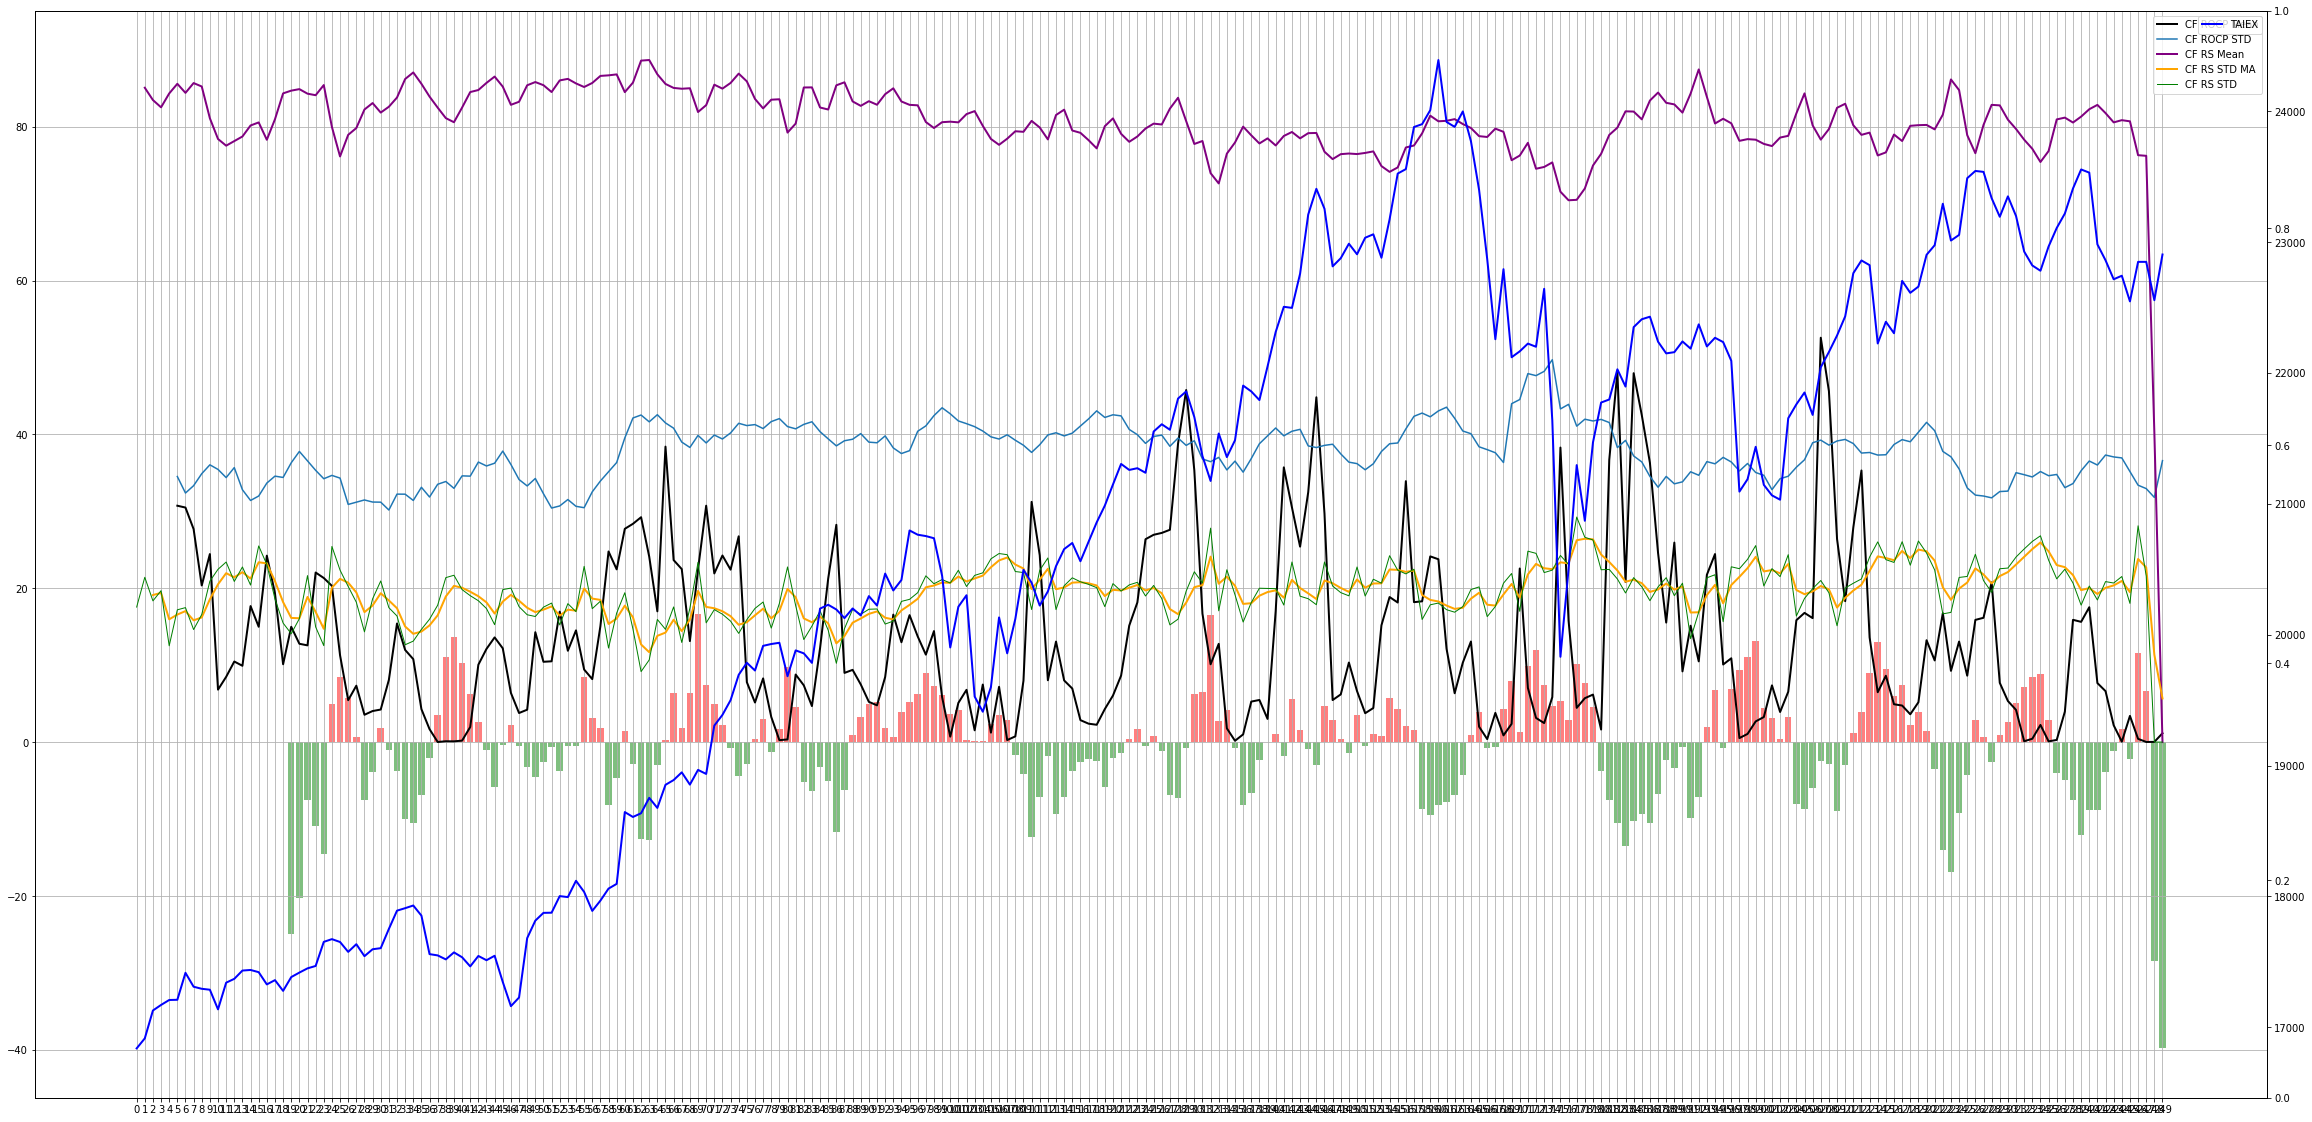

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib

df = pd.read_excel(f'C:/Users/User/Desktop/stock/100產業分析/每日策略選股數量.xlsx')
TAIEX = pd.read_csv(r'C:\Users\User\Desktop\StockInfoHub\Stock_Data_Collector\history_data\^TWII.csv', header=0)
df_profit = pd.read_excel(r'C:\Users\User\Desktop\投資檢討\投資日記.xlsx', sheet_name='投資損益(全部)', header=0)
# profit = df_profit.loc[:198, '含本金累積損益(%)']
x = 0
r = 250
TAIEX_MACD = TAIEX.iloc[-r:, :]['MACDhist'].values
TAIEX_20MA = TAIEX.iloc[-r:, :]['20MA'].values

# read profit sheet 投資損益(全部) in 投資日記 excel 


df = df.iloc[x+0:x+r].iloc[::-1].reset_index(drop=True)
print(df.iloc[[0,-1]])
taiex = df['TAIEX change %']
cf_rocp_mean = df['CF ROCP Mean']
cf_rocp_std = df['CF ROCP STD']
cf_rs_mean = df['CF ERS Mean']
cf_rs_std = df['CF ERS STD']
# norm to 1,-1
cf_rs_mean_norm11 = 2*(cf_rs_mean - cf_rs_mean.min()) / (cf_rs_mean.max() - cf_rs_mean.min()) - 1
## 10MA
n = 1
taiex_MA = df['TAIEX']
cf_rocp_mean_MA = df['CF ROCP Mean'].rolling(window=6).mean()**2
# CF_rocp_mean_sq_MA = df['CF ROCP Mean'].rolling(window=n).mean()
cf_rocp_std_MA = df['CF ROCP STD'].rolling(window=6).mean()
cf_rs_mean_MA = df['CF ERS Mean'].rolling(window=2).mean()
cf_rs_std_MA = talib.EMA(df['CF ERS STD'], 3)
## MACD, signal, hist
cf_rs_MACD, cf_rs_signal, cf_rs_hist = talib.MACD(df['CF ERS STD'], fastperiod=5, slowperiod=13, signalperiod=8)

## normalize
taiex_MA_nor = (taiex_MA - taiex_MA.min()) / (taiex_MA.max() - taiex_MA.min())
TAIEX_MACD_nor = (TAIEX_MACD - TAIEX_MACD.min()) / (TAIEX_MACD.max() - TAIEX_MACD.min())
# profit_nor = (profit - profit.min()) / (profit.max() - profit.min())
cf_rocp_mean_MA_nor = (cf_rocp_mean_MA - cf_rocp_mean_MA.min()) / (cf_rocp_mean_MA.max() - cf_rocp_mean_MA.min())
cf_rocp_std_MA_nor = (cf_rocp_std_MA - cf_rocp_std_MA.min()) / (cf_rocp_std_MA.max() - cf_rocp_std_MA.min())
cf_rs_mean_MA_nor = (cf_rs_mean_MA - cf_rs_mean_MA.min()) / (cf_rs_mean_MA.max() - cf_rs_mean_MA.min())
cf_rs_std_MA_nor = (cf_rs_std_MA - cf_rs_std_MA.min()) / (cf_rs_std_MA.max() - cf_rs_std_MA.min())
rocpmean_rsstd_diff = cf_rocp_mean_MA*15 - cf_rs_std_MA*2
rocpmean_rsstd_diff_MA = rocpmean_rsstd_diff.rolling(window=2).mean()
rocpmean_rsstd_diff_daily_change = rocpmean_rsstd_diff.diff()
color = lambda x: 'red' if x > 0 else 'green'
# if x > y then blue else light blue
TAIEX_color = lambda x,y : 'blue' if x > y else 'red'
## plot
fig, ax = plt.subplots()
ax.figure.set_size_inches(40, 20)
ax2 = ax.twinx()
ax3 = ax.twinx()
# ax2.bar(np.arange(0, len(df), 1), rocpmean_rsstd_diff_daily_change, color=[color(x) for x in rocpmean_rsstd_diff_daily_change], alpha=0.5)
# ax.bar(np.arange(0, len(df), 1), rocpmean_rsstd_diff, color=[color(x) for x in rocpmean_rsstd_diff], alpha=0.5)
# ax2.bar(np.arange(0, len(df), 1), rocpmean_rsstd_diff_MA, color=[color(x) for x in rocpmean_rsstd_diff_MA], alpha=0.5)
###
# ax.plot(taiex_MA_nor, label='TAIEX', color='blue', linewidth=2)
# ax.plot(cf_rocp_mean_MA_nor, label='CF ROCP Mean', color='black', linewidth=2)
# # ax.plot(cf_rocp_std_MA_nor, label='CF ROCP STD')
# ax.plot(cf_rs_mean_MA_nor, label='CF RS Mean', color='purple', linewidth=2)
# ax.plot(cf_rs_std_MA_nor, label='CF RS STD', color='orange', linewidth=2)

ax2.plot(taiex_MA, label='TAIEX', color='blue', linewidth=2)
# ax2.plot(TAIEX_20MA, label='TAIEX 20MA', color='green', linewidth=2)
# ax3.bar(np.arange(0, len(df), 1), TAIEX_MACD, color=[color(x) for x in TAIEX_MACD], alpha=0.5)
# ax2.bar(np.arange(0, len(df), 1), rocpmean_rsstd_diff_MA, color=[color(x) for x in rocpmean_rsstd_diff_MA], alpha=0.5)
# ax.plot(profit_nor*100, label='Profit', color='red', linewidth=2)
ax.plot(cf_rocp_mean_MA*10, label='CF ROCP Mean', color='black', linewidth=2)
ax.plot(cf_rocp_std_MA*10, label='CF ROCP STD')
ax.plot(cf_rs_mean_MA, label='CF RS Mean', color='purple', linewidth=2)
ax.plot(cf_rs_std_MA, label='CF RS STD MA', color='orange', linewidth=2)
ax.plot(cf_rs_std*1, label='CF RS STD', color='green', linewidth=1)
# plot cf rs MACD
ax.bar(np.arange(0, len(df), 1), cf_rs_hist*10, color=[color(x) for x in cf_rs_hist], alpha=0.5)



## plot diff at right y-axis


ax.legend()
ax2.legend()
ax.set_xticks(np.arange(0, len(df), 1))
# ax.set_yticks(np.arange(0, 1.1, 0.05))
ax.grid()
plt.show()



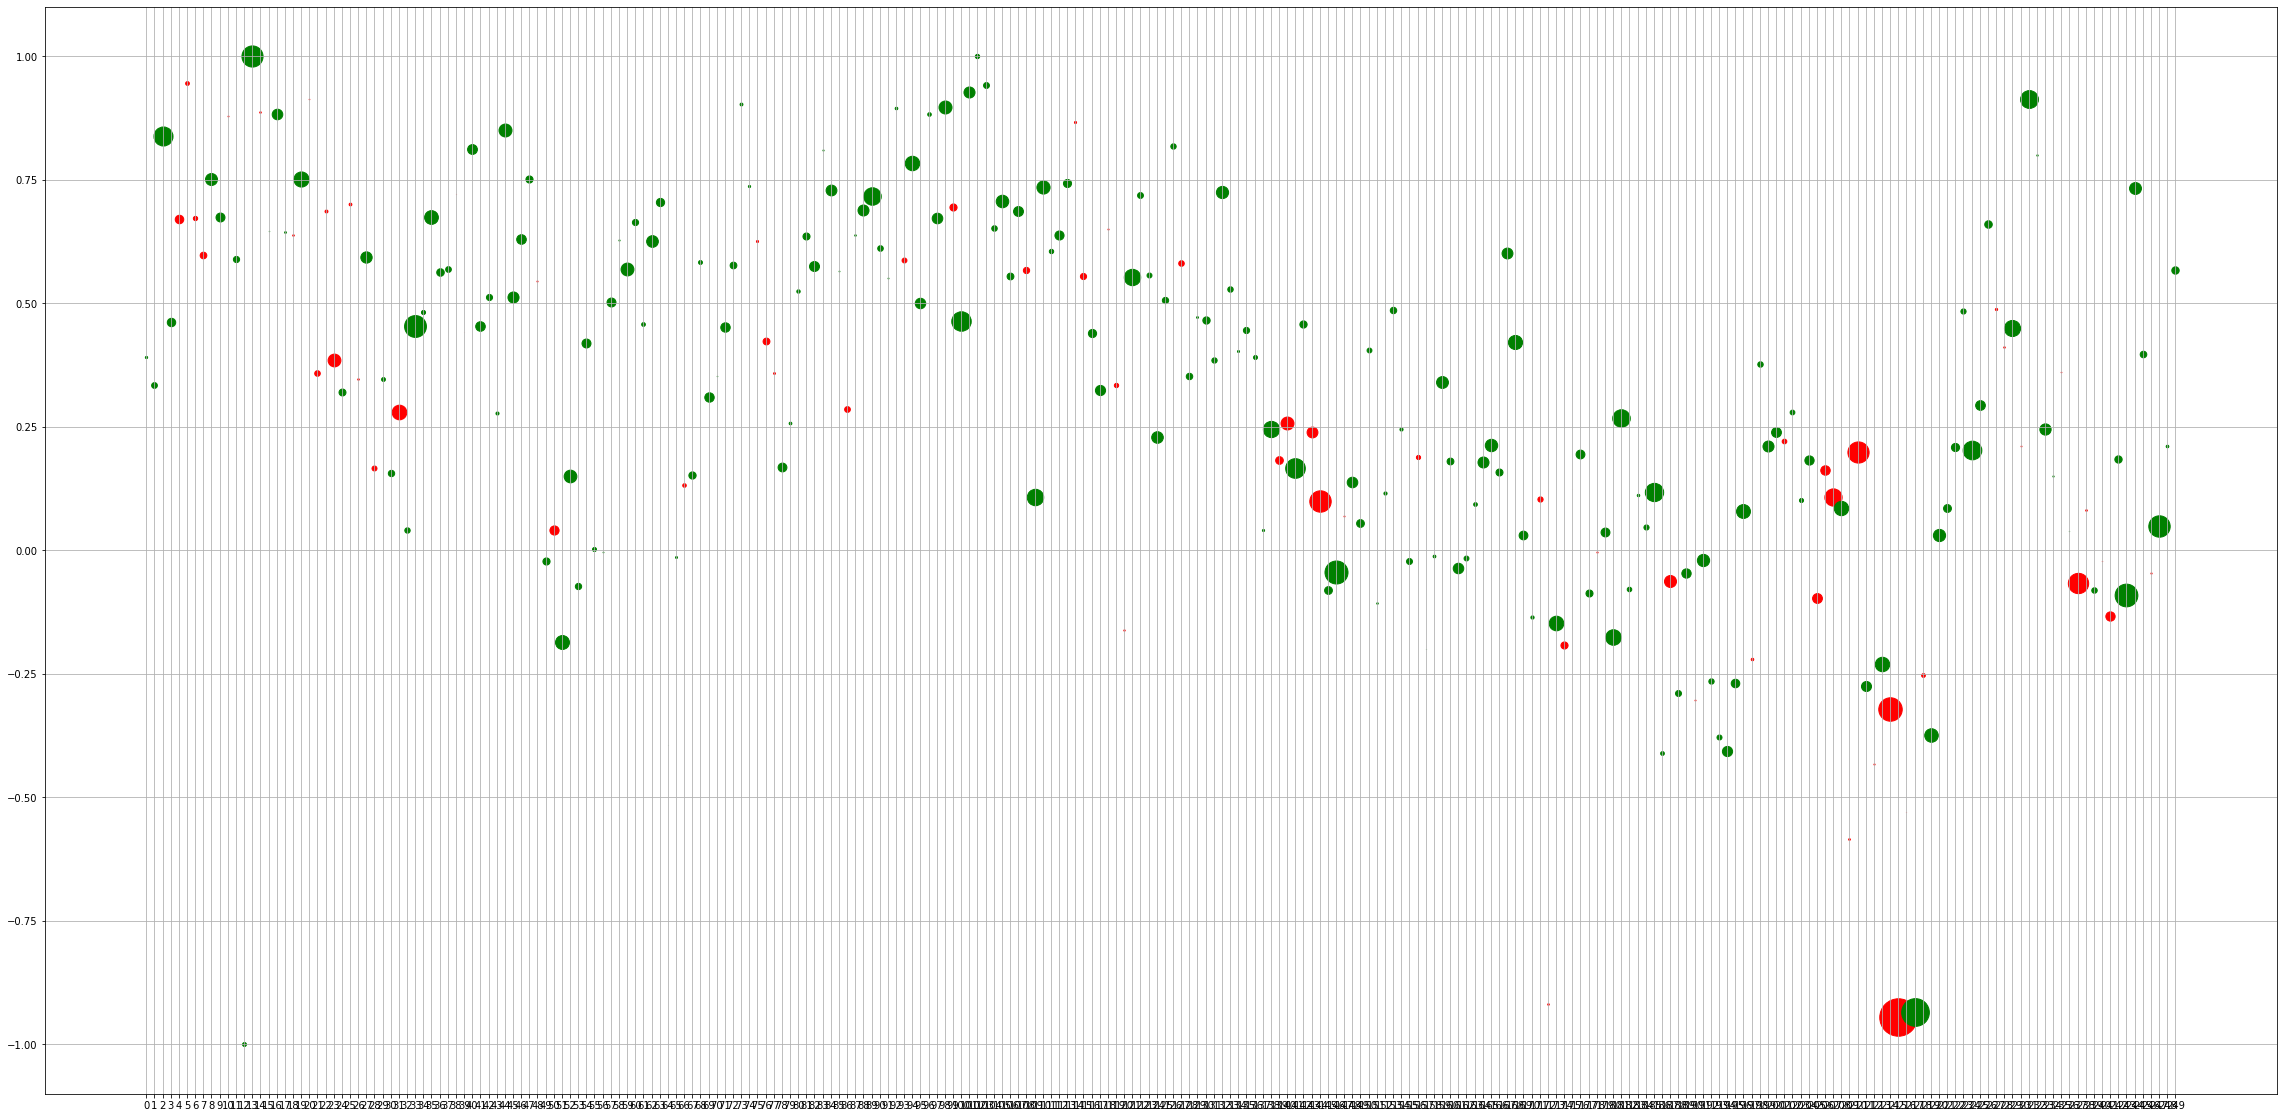

In [ ]:
fig, ax = plt.subplots()
ax.figure.set_size_inches(40, 20)
for i in np.arange(0, len(df), 1):
    x_value = i
    y_value = cf_rs_mean_norm11.iloc[i]
    size = cf_rocp_mean.iloc[i]
    if size > 0:
        ax.scatter(x_value, y_value, color='g', s=((size*10)**2/4))
    else:
        ax.scatter(x_value, y_value, color='r', s=((size*10)**2/4))
ax.set_xticks(np.arange(0, len(df), 1))
ax.grid()
plt.show()

### 畫每日RS、成交量排行

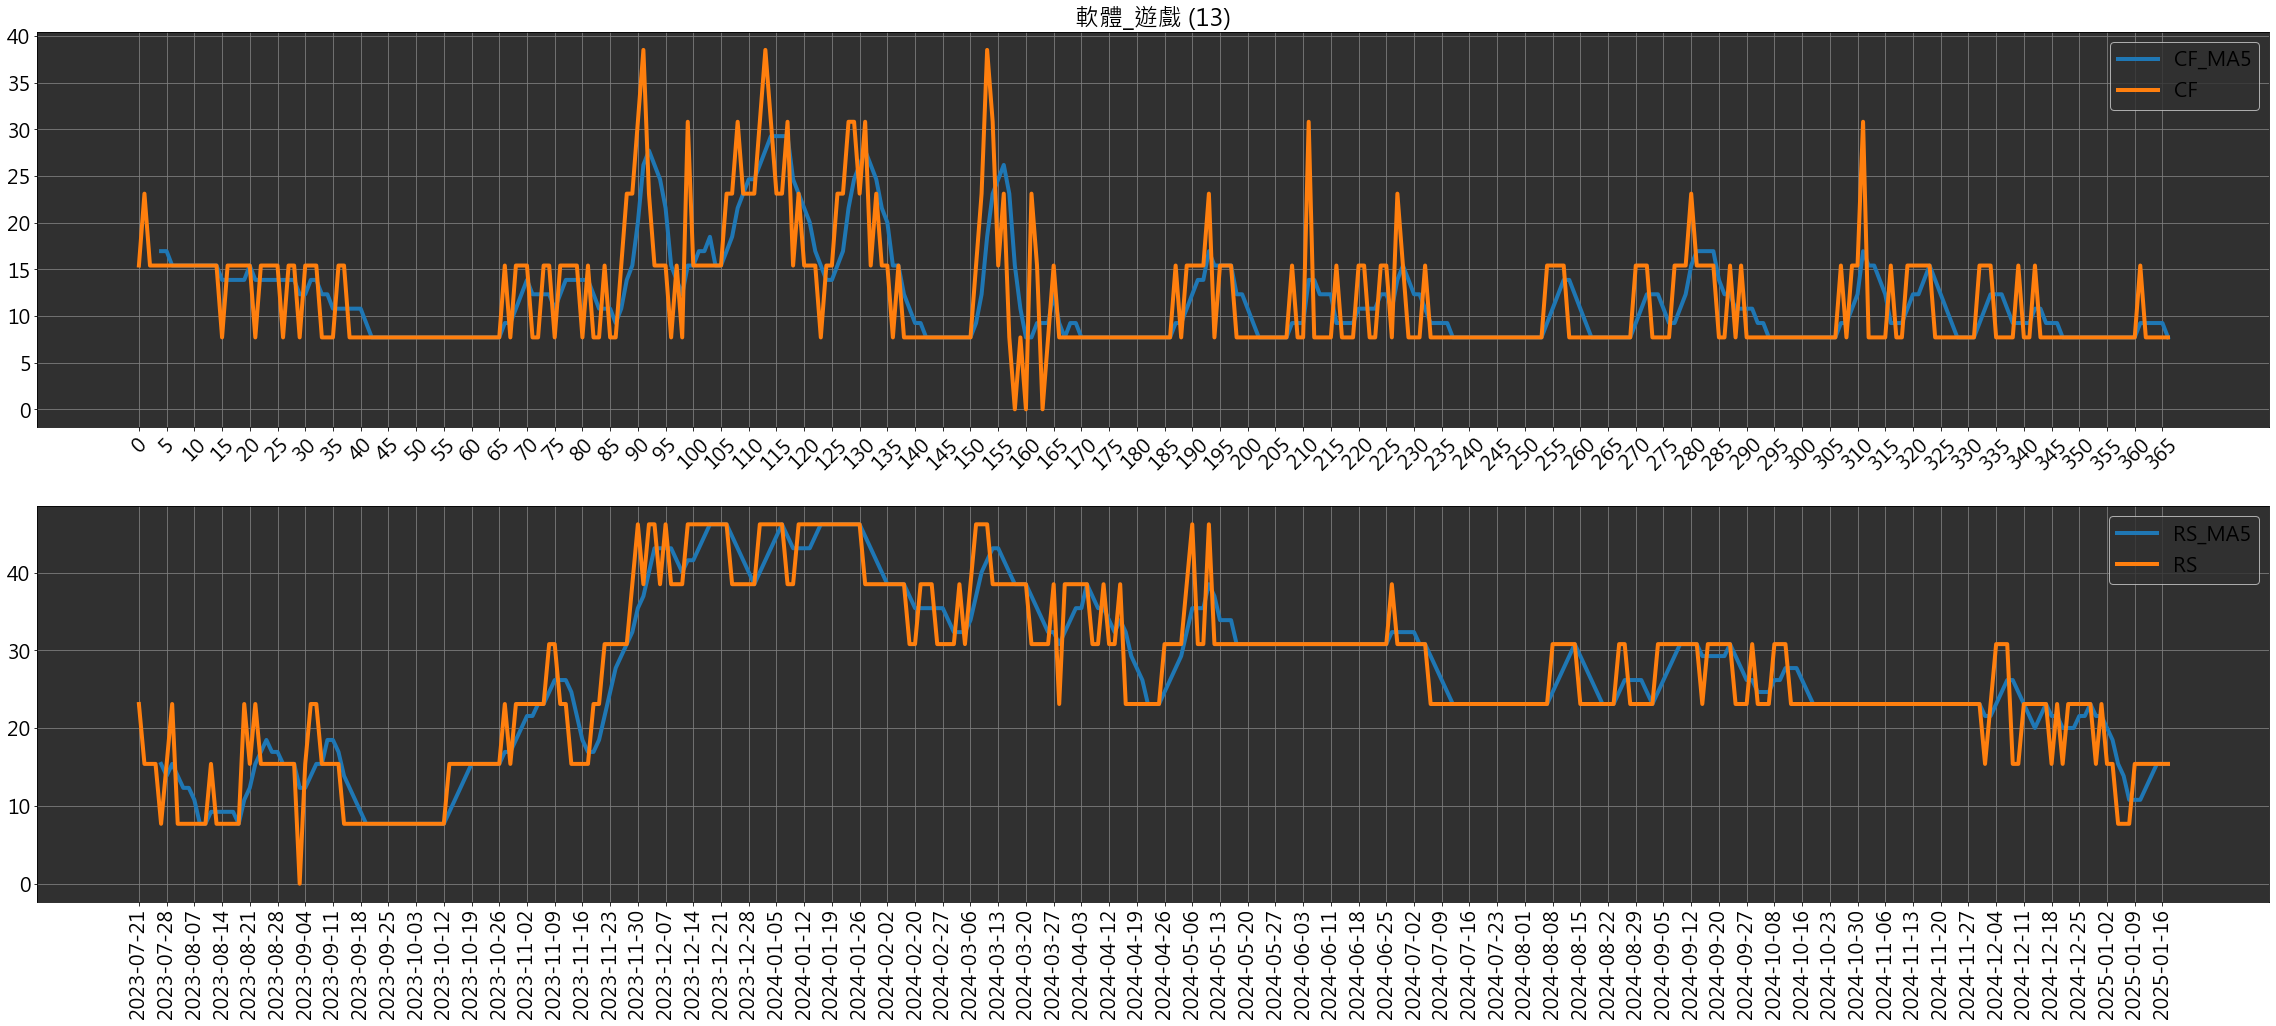

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
## set the background color of the plot to dark gray

t_list = '100產業 概念股 族群'.split(' ')#
for t in t_list:
    #100產業
    rs_df = pd.read_excel(fr'C:\Users\User\Desktop\stock\100產業分析\{t}RS排行.xlsx')
    rs_df.set_index('Unnamed: 0', inplace = True)
    # rs_df.drop(columns = ['Unnamed: 0'], inplace = True)
    rs_df.fillna(0, inplace = True)
    volume_df = pd.read_excel(fr'C:\Users\User\Desktop\stock\100產業分析\{t}成交值排行.XLSX')
    volume_df.set_index('Unnamed: 0', inplace = True)
    # volume_df.drop(columns = ['Unnamed: 0'], inplace = True)
    volume_df.fillna(0, inplace = True)
    # true_volume_df = pd.read_excel(fr'C:\Users\User\Desktop\StockInfoHub\Stock_RS_rate_analysis\100產業分析\100產業實質成交值排行.XLSX')
    # true_volume_date = true_volume_df['Unnamed: 0'].iloc[1:199].values

    # true_volume_df.set_index('Unnamed: 0', inplace = True)
    # true_volume_df.drop(columns = ['Unnamed: 0'], inplace = True)
    # true_volume_df.fillna(0, inplace = True)
    col_names = rs_df.columns.tolist()
    print(col_names)
    rs_df.columns = [f'{col}_RS' for col in rs_df.columns]
    volume_df.columns = [f'{col}_CF' for col in volume_df.columns]
    concate_df = pd.concat([rs_df, volume_df], axis = 1)
    # concate_df.set_index('Unnamed: 0_RS', inplace = True)
    print(concate_df.columns)
    number = concate_df.loc['number']
    concate_df.drop('number', axis = 0, inplace = True)
    def MA(data, period):
        data = pd.Series(data.flatten())
        return data.rolling(window = period).mean()
    d = 1000
    # maxmin scale
    from sklearn.preprocessing import MinMaxScaler
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
    plt.rcParams['font.size'] = 20
    plt.rcParams['axes.facecolor'] = '#303030'
    # use "warn" background style
    plt.style.use('fast')

    for col in col_names:
        if int(number.loc[f'{col}_RS']) < 5:
            continue
        CF = concate_df[f'{col}_CF'].astype(float)
        RS = concate_df[f'{col}_RS'].astype(float)
        plt.figure(figsize = (40, 16))
        scaler = MinMaxScaler()
        D = concate_df.index.values[:-d][::-1]
        # CF = scaler.fit_transform(CF.values.reshape(-1, 1))[:-d][::-1]
        CF = CF.values[:-d][::-1]
        print(len(CF))
        CF_ma = MA(CF, 5)
        #CF_ma10 = MA(CF, 10)
        # RS = scaler.fit_transform(RS.values.reshape(-1, 1))[:-d][::-1]
        RS = RS.values[:-d][::-1]
        RS_ma = MA(RS, 5)
        #RS_ma10 = MA(RS, 10)
        plt.subplot(2, 1, 1)
        plt.plot(D, CF_ma, label = 'CF_MA5', linewidth = 4)
        plt.plot(D, CF, label = 'CF', linewidth = 4)
        #plt.plot(D, CF_ma10, label = 'CF_MA10', linewidth = 4)
        # plt.scatter(D, CF, label = 'CF', s = 20)
        plt.xticks([i for i in range(0, len(D), 5)], [i for i in range(0, len(D), 5)], rotation = 45)
        plt.title(f'{col} ({int(number.loc[f"{col}_RS"])})')
        plt.legend()
        plt.grid(c = 'gray')
        plt.subplot(2, 1, 2)
        plt.plot(D, RS_ma, label = 'RS_MA5', linewidth = 4)
        plt.plot(D, RS, label = 'RS', linewidth = 4)
        #plt.plot(D, RS_ma10, label = 'RS_MA10', linewidth = 4)
        # plt.scatter(D, RS, label = 'RS', s = 20)
        plt.xticks([i for i in range(0, len(D), 5)], list(map(lambda x:x.split(' ')[0], D[::5])), rotation = 90)
        # plt.title(f'{col}')
        # legend font color
        plt.legend()
        plt.grid(c = 'gray')
        plt.savefig(f'C:/Users/User/Desktop/stock/100產業分析/每日圖表({t})/{col}.png', bbox_inches = 'tight')
        clear_output()
        plt.show()

#

### 畫RS、產業指數

In [ ]:

for col in ['IC設計']:
    true_volume_percentage = true_volume_df[col].iloc[1:199].astype(float).values
    scale2 = MinMaxScaler()
    true_volume_percentage = scale2.fit_transform(true_volume_percentage.reshape(-1,1)).reshape(-1)
    rs_percentage = rs_df[col].iloc[1:199].astype(float).values
    scale3 = MinMaxScaler()
    rs_percentage = scale3.fit_transform(rs_percentage.reshape(-1,1)).reshape(-1)
    print(col)
    plt.figure(figsize=(30,15))
    # plt.subplot(211)
    plt.plot(true_volume_df.index.values[1:199][::-1], true_volume_percentage, label = 'true_volume')
    plt.xticks(np.arange(1,199,20), true_volume_date[::-1][::20], rotation = 45)
    plt.plot(rs_df.index.values[1:199][::-1], rs_percentage, label = 'rs')
    plt.xticks(np.arange(1,199,20), true_volume_date[::-1][::20], rotation = 45)
    plt.grid()
    plt.legend(fontsize = 14)
    plt.show()
    # break

In [ ]:
for col in col_names:
    rs_percentage = rs_df[col].iloc[1:200].astype(float).values[::-1]
    # print(rs_percentage[:10])
    volume_percentage = volume_df[col].iloc[1:200].astype(float).values[::-1]
    # print(rs_percentage)
    true_volume_percentage = true_volume_df[col].iloc[1:200].astype(float).values[::-1]
    # print(true_volume_percentage)
    print(col)
    plt.figure(figsize=(30,20))
    plt.subplot(311)
    plt.plot(rs_percentage, label = 'rs')
    plt.grid()
    plt.legend()
    plt.subplot(312)
    plt.plot(volume_percentage, label = 'volume')
    plt.grid()
    plt.legend()
    plt.subplot(313)
    plt.plot(true_volume_percentage, label = 'true_volume')
    # plt.title(col)
    plt.grid()
    plt.legend()
    plt.show()
    # break